### 실습목표
- 퍼셉트론을 직접 만들어보고 이해하자
- 퍼셉트론의 단점을 보완하는 MLP를 만들어보자

In [1]:
import numpy as np

In [2]:
# 활성화 함수 (Activation fuction)
def activation_func(x):
  if x <= 0 :
    return 0
  else:
    return 1

In [3]:
# 퍼셉트론 함수
def perceptron(x) :
  w = 10
  b = -3
  # 선형모델
  y= w * x + b
  return activation_func(y)

In [7]:
input_data=10
a1=perceptron(input_data)
a2=perceptron(a1)
a2

1

### AND 퍼셉트론

In [13]:
def AND_perceptron(x1,x2):
  w1 = 1
  w2 = 1
  b = -1
  y= x1*w1 + x2*w2 + b # 선형모델
  return activation_func(y)

In [14]:
print(AND_perceptron(0,0)) #0
print(AND_perceptron(1,0)) #0
print(AND_perceptron(0,1)) #0
print(AND_perceptron(1,1)) #1

0
0
0
1


### OR 퍼셉트론 만들기

In [17]:
def OR_perceptron(x1,x2):
  w1 = 1
  w2 = 1
  b = 0
  y= x1*w1 + x2*w2 + b # 선형모델
  return activation_func(y)

In [18]:
print(OR_perceptron(0,0)) #0
print(OR_perceptron(1,0)) #1
print(OR_perceptron(0,1)) #1
print(OR_perceptron(1,1)) #1

0
1
1
1


### NAND 퍼셉트론 만들기

In [26]:
def NAND_perceptron(x1,x2):
  w1 = -1
  w2 = -1
  b = 1.5
  y= x1*w1 + x2*w2 + b # 선형모델
  return activation_func(y)

In [27]:
print(NAND_perceptron(0,0)) #1
print(NAND_perceptron(1,0)) #1
print(NAND_perceptron(0,1)) #1
print(NAND_perceptron(1,1)) #0

1
1
1
0


### XOR MLP 만들기

In [28]:
def XOR_MLP(x1,x2):
  a1=NAND_perceptron(x1,x2)
  a2=OR_perceptron(x1,x2)
  return AND_perceptron(a1,a2)

In [29]:
print(XOR_MLP(0,0))
print(XOR_MLP(0,1))
print(XOR_MLP(1,0))
print(XOR_MLP(1,1))

0
1
1
0


### keras로 XOR MLP 만들기

In [31]:
X=np.array([[1,1],
           [1,0],
           [0,1],
           [0,0]])
y=np.array([0,1,1,0])

In [32]:
X.shape, y.shape

((4, 2), (4,))

In [33]:
from tensorflow.keras.models import Sequential # 뼈대
from tensorflow.keras.layers import Dense # 뉴런 (퍼셉트론)의 묶음을 표현하는 클래스
from tensorflow.keras.layers import InputLayer # 입력층

In [35]:
# 모델 구조 설계
XOR_model= Sequential()
XOR_model.add(InputLayer(input_shape=(2,))) # 데이터 모양을 표현
XOR_model.add(Dense(units=2, activation="sigmoid")) # 중간층
XOR_model.add(Dense(units=1, activation="sigmoid")) # 출력층

In [36]:
XOR_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
# 모델학습 및 평가방법 설정
XOR_model.compile(loss="binary_crossentropy", # 모델의 오차를 계산하는 함수
                optimizer="Adam", # 머델의 최적화를 도와주는 알고리즘
                metrics=['accuracy']) # 모델의 평가지표 설정

In [39]:
# 모델학습
h=XOR_model.fit(X,y,epochs=3000)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 10ms/step - loss: 0.6692 - accuracy: 0.7500
Epoch 502/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.6691 - accuracy: 0.7500
Epoch 503/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.6690 - accuracy: 0.7500
Epoch 504/3000
1/1 [==============================] - 0s 10ms/step - loss: 0.6690 - accuracy: 0.7500
Epoch 505/3000
1/1 [==============================] - 0s 12ms/step - loss: 0.6689 - accuracy: 0.7500
Epoch 506/3000
1/1 [==============================] - 0s 10ms/step - loss: 0.6688 - accuracy: 0.7500
Epoch 507/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.6687 - accuracy: 0.7500
Epoch 508/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.6686 - accuracy: 0.7500
Epoch 509/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.6685 - accuracy: 0.7500
Epoch 510/3000
1/1 [==============================] - 0s 7ms/step - loss: 0

In [40]:
# 학습결과 시각화
import matplotlib.pyplot as plt

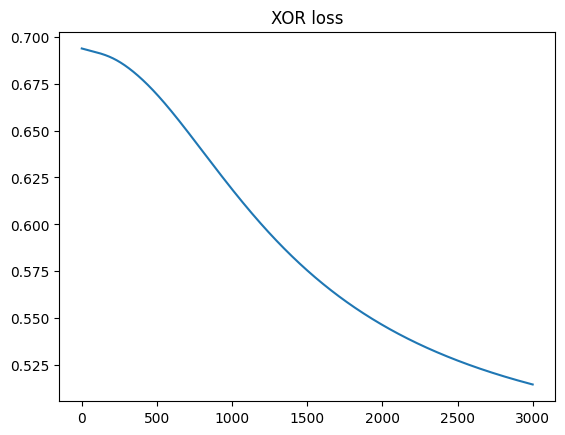

In [42]:
plt.plot(h.history['loss'])
plt.title("XOR loss")
plt.show()

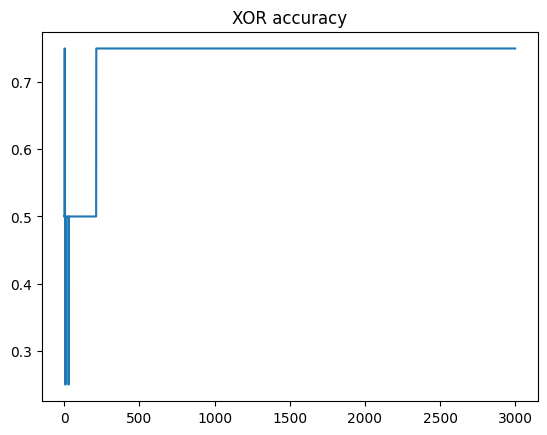

In [43]:
plt.plot(h.history['accuracy'])
plt.title("XOR accuracy")
plt.show()

# 가중치 확인하기

In [44]:
XOR_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
XOR_model.get_layer("dense").get_weights()

[array([[-4.257186 , -4.028951 ],
        [-4.449987 , -4.3602085]], dtype=float32),
 array([0.52740943, 0.3934534 ], dtype=float32)]

In [46]:
XOR_model.get_layer("dense_1").get_weights()

[array([[-2.6856933],
        [-2.782374 ]], dtype=float32),
 array([0.67811483], dtype=float32)]